# Data Lifecycle Demo: Raw → Processed → Outputs

**Milestone 4.12: Organizing Raw Data, Processed Data, and Output Artifacts**

This notebook demonstrates the proper data lifecycle and why separation matters.

---

## 🎯 Learning Objectives

By the end of this notebook, you will understand:

1. ✅ Why raw data must **never** be modified
2. ✅ How to properly separate data stages
3. ✅ The risks of mixing data folders
4. ✅ One-directional data flow: raw → processed → outputs
5. ✅ How separation enables reproducibility

---

## ⚠️ Common Mistake: What NOT to Do

### ❌ BAD Practice - Overwriting Raw Data

```python
# DON'T DO THIS!
df = pd.read_csv('data/raw/sales.csv')  # Load raw data
df = df.dropna()                         # Clean it
df.to_csv('data/raw/sales.csv')         # OVERWRITES ORIGINAL!
```

**Problems:**
- 🔥 Original data is **lost forever**
- 🔥 Can't reproduce results from true source
- 🔥 No audit trail
- 🔥 Can't compare cleaned vs original

### ✅ CORRECT Practice - Preserve Raw Data

```python
# Do this instead!
df = pd.read_csv('data/raw/sales.csv')              # Load raw (read-only)
df_cleaned = df.dropna()                            # Clean in memory
df_cleaned.to_csv('data/processed/sales_cleaned.csv')  # Save separately!
```

**Benefits:**
- ✅ Raw data intact
- ✅ Can always return to source
- ✅ Clear lineage: sales.csv → sales_cleaned.csv
- ✅ Reproducible

---

## 📂 Step 1: Load Raw Data (Read-Only)

Raw data is the **source of truth**. We never modify it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load raw data (READ-ONLY)
df_raw = pd.read_csv('../data/raw/sample_sales.csv')

print("=" * 50)
print("📁 RAW DATA LOADED (Read-Only)")
print("=" * 50)
print(f"Source: data/raw/sample_sales.csv")
print(f"Shape: {df_raw.shape}")
print(f"\nFirst 3 rows:")
print(df_raw.head(3))

print("\n⚠️ IMPORTANT: We will NOT modify this file!")
print("Raw data is sacred—treat as evidence.")

📁 RAW DATA LOADED (Read-Only)
Source: data/raw/sample_sales.csv
Shape: (8, 6)

First 3 rows:
   customer_id  order_date  product_id  quantity  price  total_amount
0        12345  2024-01-15       98765         3  29.99         89.97
1        12346  2024-01-15       98766         1  49.99         49.99
2        12347  2024-01-16       98765         2  29.99         59.98

⚠️ IMPORTANT: We will NOT modify this file!
Raw data is sacred—treat as evidence.


## 🔍 Step 2: Inspect Data Quality

Before processing, check for issues in the raw data.

In [2]:
print("=" * 50)
print("🔍 RAW DATA QUALITY CHECK")
print("=" * 50)

print(f"\nTotal records: {len(df_raw)}")
print(f"\nMissing values per column:")
print(df_raw.isnull().sum())

print(f"\nDuplicate rows: {df_raw.duplicated().sum()}")

print(f"\nData types:")
print(df_raw.dtypes)

print("\n✅ Quality check complete. Raw data remains unchanged.")

🔍 RAW DATA QUALITY CHECK

Total records: 8

Missing values per column:
customer_id     0
order_date      0
product_id      0
quantity        0
price           0
total_amount    0
dtype: int64

Duplicate rows: 0

Data types:
customer_id       int64
order_date       object
product_id        int64
quantity          int64
price           float64
total_amount    float64
dtype: object

✅ Quality check complete. Raw data remains unchanged.


## 🧹 Step 3: Process Data (In Memory)

We clean and transform data **in memory**, never touching the raw file.

In [3]:
print("=" * 50)
print("🧹 PROCESSING DATA")
print("=" * 50)

# Create a copy to process (never modify df_raw!)
df_processed = df_raw.copy()

print("Processing steps:")

# Step 1: Remove duplicates
before_dup = len(df_processed)
df_processed = df_processed.drop_duplicates()
after_dup = len(df_processed)
print(f"  1. Removed {before_dup - after_dup} duplicate rows")

# Step 2: Remove missing values
before_na = len(df_processed)
df_processed = df_processed.dropna()
after_na = len(df_processed)
print(f"  2. Removed {before_na - after_na} rows with missing values")

# Step 3: Filter invalid data (quantity > 0)
before_filter = len(df_processed)
df_processed = df_processed[df_processed['quantity'] > 0]
after_filter = len(df_processed)
print(f"  3. Removed {before_filter - after_filter} rows with invalid quantity")

print(f"\n✅ Processing complete:")
print(f"   Raw records: {len(df_raw)}")
print(f"   Processed records: {len(df_processed)}")
print(f"\n⚠️ Raw data file NOT modified—changes only in memory!")

🧹 PROCESSING DATA
Processing steps:
  1. Removed 0 duplicate rows
  2. Removed 0 rows with missing values
  3. Removed 0 rows with invalid quantity

✅ Processing complete:
   Raw records: 8
   Processed records: 8

⚠️ Raw data file NOT modified—changes only in memory!


## 💾 Step 4: Save Processed Data (Separate Location)

Processed data goes to **data/processed/**, never overwrites raw.

In [4]:
print("=" * 50)
print("💾 SAVING PROCESSED DATA")
print("=" * 50)

# Save to processed folder
output_path = '../data/processed/sample_sales_cleaned.csv'
df_processed.to_csv(output_path, index=False)

print(f"✅ Saved to: {output_path}")
print(f"\nFile size: {os.path.getsize(output_path)} bytes")

print("\n📂 Data Separation Verified:")
print("   Raw:       data/raw/sample_sales.csv       (UNTOUCHED)")
print("   Processed: data/processed/sample_sales_cleaned.csv (NEW)")

print("\n✅ Traceability maintained: We can always trace cleaned data back to raw source.")

💾 SAVING PROCESSED DATA
✅ Saved to: ../data/processed/sample_sales_cleaned.csv

File size: 370 bytes

📂 Data Separation Verified:
   Raw:       data/raw/sample_sales.csv       (UNTOUCHED)
   Processed: data/processed/sample_sales_cleaned.csv (NEW)

✅ Traceability maintained: We can always trace cleaned data back to raw source.


## 📊 Step 5: Analyze Processed Data

Analysis uses **processed data**, not raw data.

In [5]:
print("=" * 50)
print("📊 ANALYZING PROCESSED DATA")
print("=" * 50)

# Calculate metrics
total_revenue = df_processed['total_amount'].sum()
avg_order = df_processed['total_amount'].mean()
total_orders = len(df_processed)

print(f"\n📈 Business Metrics:")
print(f"   Total Revenue: ${total_revenue:,.2f}")
print(f"   Average Order: ${avg_order:,.2f}")
print(f"   Total Orders: {total_orders}")

# Get top customers
top_customers = df_processed.groupby('customer_id')['total_amount'].sum().nlargest(5)

print(f"\n🏆 Top 5 Customers:")
for i, (customer_id, amount) in enumerate(top_customers.items(), 1):
    print(f"   {i}. Customer {customer_id}: ${amount:,.2f}")

print("\n✅ Analysis complete. Results will be saved to outputs/")

📊 ANALYZING PROCESSED DATA

📈 Business Metrics:
   Total Revenue: $929.82
   Average Order: $116.23
   Total Orders: 8

🏆 Top 5 Customers:
   1. Customer 12346: $249.97
   2. Customer 12348: $249.95
   3. Customer 12345: $189.96
   4. Customer 12350: $149.97
   5. Customer 12347: $59.98

✅ Analysis complete. Results will be saved to outputs/


## 📈 Step 6: Generate Output - Visualization

Visualizations go to **outputs/figures/**, not in data folders.

📈 GENERATING VISUALIZATION

✅ Visualization saved to: ../outputs/figures/top_customers_lifecycle.png


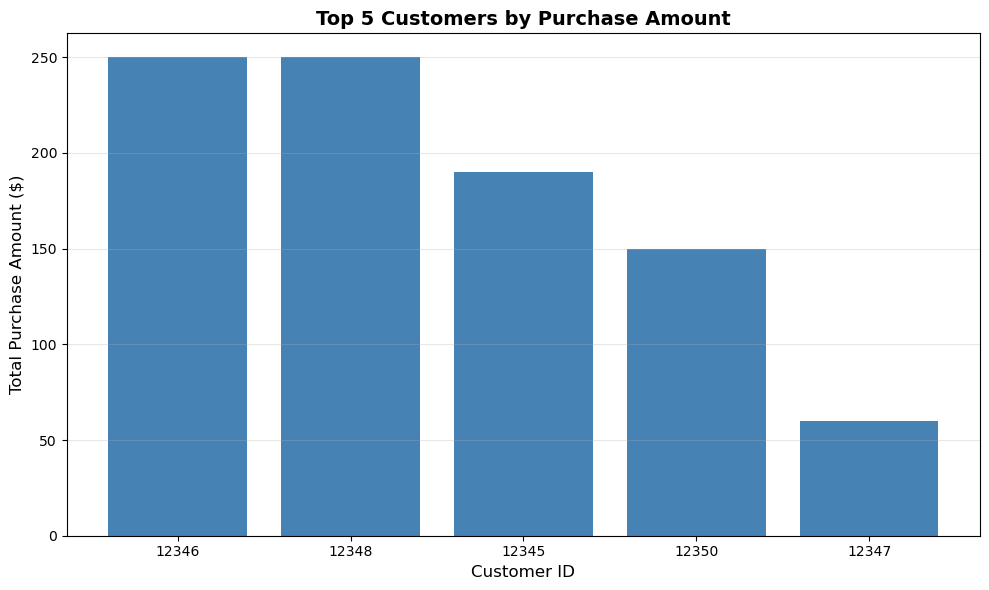


⚠️ Note: Output saved to outputs/figures/, NOT in data/ folder!


In [6]:
print("=" * 50)
print("📈 GENERATING VISUALIZATION")
print("=" * 50)

# Create visualization
plt.figure(figsize=(10, 6))
plt.bar(top_customers.index.astype(str), top_customers.values, color='steelblue')
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Purchase Amount ($)', fontsize=12)
plt.title('Top 5 Customers by Purchase Amount', fontsize=14, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Save to outputs/figures/
output_path = '../outputs/figures/top_customers_lifecycle.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"\n✅ Visualization saved to: {output_path}")

plt.show()

print("\n⚠️ Note: Output saved to outputs/figures/, NOT in data/ folder!")

## 📄 Step 7: Generate Output - Report

Reports go to **outputs/reports/**, separate from data.

In [7]:
print("=" * 50)
print("📄 GENERATING REPORT")
print("=" * 50)

# Generate summary statistics
summary_stats = df_processed.describe()

# Save to outputs/reports/
output_path = '../outputs/reports/sales_summary_lifecycle.csv'
summary_stats.to_csv(output_path)
print(f"\n✅ Report saved to: {output_path}")

print("\nSummary Statistics:")
print(summary_stats)

print("\n⚠️ Note: Report saved to outputs/reports/, NOT in data/ folder!")

📄 GENERATING REPORT

✅ Report saved to: ../outputs/reports/sales_summary_lifecycle.csv

Summary Statistics:
       customer_id    product_id  quantity      price  total_amount
count      8.00000      8.000000   8.00000   8.000000      8.000000
mean   12347.00000  98765.875000   2.25000  54.990000    116.227500
std        1.85164      0.834523   1.38873  29.277002     77.437488
min    12345.00000  98765.000000   1.00000  29.990000     29.990000
25%    12345.75000  98765.000000   1.00000  29.990000     57.482500
50%    12346.50000  98766.000000   2.00000  49.990000     94.980000
75%    12348.25000  98766.250000   3.00000  62.490000    162.472500
max    12350.00000  98767.000000   5.00000  99.990000    249.950000

⚠️ Note: Report saved to outputs/reports/, NOT in data/ folder!


## ✅ Step 8: Verify Data Separation

Let's verify all data stages are properly separated.

In [8]:
import os

print("=" * 70)
print("✅ DATA LIFECYCLE VERIFICATION")
print("=" * 70)

print("\n📁 STAGE 1: RAW DATA (Source of Truth)")
print("   Location: data/raw/")
print("   Status: READ-ONLY, NEVER MODIFIED")
raw_files = os.listdir('../data/raw/')
for f in raw_files:
    if f.endswith('.csv'):
        print(f"   ✓ {f}")

print("\n📁 STAGE 2: PROCESSED DATA (Cleaned & Transformed)")
print("   Location: data/processed/")
print("   Status: DERIVED FROM RAW, REPRODUCIBLE")
processed_files = os.listdir('../data/processed/')
for f in processed_files:
    if f.endswith('.csv'):
        print(f"   ✓ {f}")

print("\n📁 STAGE 3: OUTPUT ARTIFACTS (Final Results)")
print("   Location: outputs/figures/ and outputs/reports/")
print("   Status: GENERATED FROM PROCESSED DATA")

print("\n   Figures:")
fig_files = os.listdir('../outputs/figures/')
for f in fig_files:
    if f.endswith('.png'):
        print(f"     ✓ {f}")

print("\n   Reports:")
report_files = os.listdir('../outputs/reports/')
for f in report_files:
    if f.endswith('.csv'):
        print(f"     ✓ {f}")

print("\n" + "=" * 70)
print("🎯 DATA FLOW DIAGRAM")
print("=" * 70)
print("""
    data/raw/sample_sales.csv (ORIGINAL, UNTOUCHED)
              ↓
         [LOAD & CLEAN]
              ↓
    data/processed/sample_sales_cleaned.csv (REPRODUCIBLE)
              ↓
         [ANALYZE]
              ↓
    ┌─────────────────┬─────────────────┐
    ↓                 ↓                 ↓
outputs/figures/  outputs/reports/  [Other outputs]
(Visualizations)  (Statistics)      (Models, etc.)
""")

print("=" * 70)
print("✅ ALL DATA STAGES PROPERLY SEPARATED")
print("=" * 70)
print("\n🎉 Data lifecycle demonstration complete!")
print("\nKey Principles Demonstrated:")
print("  ✓ Raw data never modified (read-only)")
print("  ✓ Processed data saved separately (reproducible)")
print("  ✓ Outputs clearly organized (findable)")
print("  ✓ One-directional flow: raw → processed → outputs")
print("  ✓ Clear data lineage maintained")

✅ DATA LIFECYCLE VERIFICATION

📁 STAGE 1: RAW DATA (Source of Truth)
   Location: data/raw/
   Status: READ-ONLY, NEVER MODIFIED
   ✓ sample_sales.csv

📁 STAGE 2: PROCESSED DATA (Cleaned & Transformed)
   Location: data/processed/
   Status: DERIVED FROM RAW, REPRODUCIBLE
   ✓ sample_sales_cleaned.csv

📁 STAGE 3: OUTPUT ARTIFACTS (Final Results)
   Location: outputs/figures/ and outputs/reports/
   Status: GENERATED FROM PROCESSED DATA

   Figures:
     ✓ top_customers.png
     ✓ top_customers_lifecycle.png

   Reports:
     ✓ sales_summary_lifecycle.csv
     ✓ sales_summary_statistics.csv

🎯 DATA FLOW DIAGRAM

    data/raw/sample_sales.csv (ORIGINAL, UNTOUCHED)
              ↓
         [LOAD & CLEAN]
              ↓
    data/processed/sample_sales_cleaned.csv (REPRODUCIBLE)
              ↓
         [ANALYZE]
              ↓
    ┌─────────────────┬─────────────────┐
    ↓                 ↓                 ↓
outputs/figures/  outputs/reports/  [Other outputs]
(Visualizations)  (Statisti

---

## 🎓 Summary: Why Data Separation Matters

### Key Principles:

1. **Raw Data is Sacred**
   - Never modify raw data files
   - Treat as read-only evidence
   - Source of truth for all analysis

2. **Processed Data is Reproducible**
   - Created from raw data + processing scripts
   - Can be regenerated if lost
   - Clear naming shows processing stage

3. **Outputs are Final Results**
   - Generated from processed data
   - Organized by type (figures, reports, models)
   - Easy to locate and share

4. **One-Directional Flow**
   - Data flows: raw → processed → outputs
   - Never backwards
   - No circular dependencies

5. **Separation Enables Reproducibility**
   - Can trace results back to source
   - Can re-run analysis from raw data
   - Clear audit trail

---

### Common Mistakes to Avoid:

❌ Overwriting raw data with cleaned versions

❌ Mixing processed files with raw data

❌ Saving outputs in data folders

❌ Creating circular dependencies between stages

❌ Using unclear naming conventions

---

### Professional Benefits:

✅ **Data Integrity** - Raw data protected

✅ **Reproducibility** - Results can be verified

✅ **Traceability** - Clear data lineage

✅ **Collaboration** - Others can understand your workflow

✅ **Trust** - Stakeholders confident in results

---

## 🎯 Milestone 4.12 Complete!

You have successfully demonstrated:
- ✅ Proper separation of raw, processed, and output data
- ✅ Read-only treatment of raw data
- ✅ Clear data lineage and traceability
- ✅ One-directional data flow
- ✅ Professional data organization practices

**This is the foundation of reproducible Data Science!** 🚀